In [1]:
!pip install numpy==1.24.3
!pip install pandas-ta

  Using cached numpy-1.24.3.tar.gz (10.9 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [186]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta

tickers = ['RELIANCE.NS', 'HDFCBANK.NS', 'INFY.NS', 'ICICIBANK.NS', 'TCS.NS']


data = {}

for ticker in tickers:
    df = yf.download(ticker, start="2020-01-01", end="2024-12-31")
    df['RSI'] = ta.rsi(df['Close'].squeeze(), length=14)
    data[ticker] = df


/tmp/ipython-input-749595403.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-749595403.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-749595403.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-749595403.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipy

In [187]:
lookback = 20
std_factor = 2
for df in data.values():
    df['BB_Middle'] = df['Close'].rolling(window=lookback).mean()
    df['BB_Std'] = df['Close'].rolling(window=lookback).std()
    df['BB_Upper'] = df['BB_Middle'] + (std_factor * df['BB_Std'])
    df['BB_Lower'] = df['BB_Middle'] - (std_factor * df['BB_Std'])

In [188]:
for df in data.values():
    for timetick in range(data[tickers[0]].shape[0]):
      if (df['RSI'][timetick] < 50):
        df['LongEntry'] = df['Close'].values[:, 0] < (df['BB_Lower'].values * 1.0)
      else:
        df['LongEntry'] = False

      if (df['RSI'][timetick] > 45):
        df['Exit'] = df['Close'].values[:,0] > df['BB_Upper'].values
      else:
        df['Exit'] = False

    df.iloc[:20, df.columns.get_loc('LongEntry')] = False
    df.iloc[:20, df.columns.get_loc('Exit')] = False

/tmp/ipython-input-719067731.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (df['RSI'][timetick] < 50):
/tmp/ipython-input-719067731.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (df['RSI'][timetick] > 45):
/tmp/ipython-input-719067731.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (df['RSI'][timetick] < 50):
/tmp/ipython-input-719067731.py:8: FutureWarning: Series.__getitem__ treating keys as positions is d

RSI value being lower than 50 would show us that the stock is currently undersold, and a trend reversal is expected. This combined with the Bollinger Band gives us a strong buy signal.

Similarly, an RSI value greater than 50 with the price going lower than the Lower Band gives us a strong sell signal, which is where we exit our long position.

In [189]:
revenue = 0
principle = 0
stocks = {
    'Company': tickers,
    'Quantity': [0] * len(tickers),
    'Value': [0] * len(tickers)
}
buy_quantity = 10
portfolio_value = []
principle_values = []

for timetick in range(data[tickers[0]].shape[0]):
    for index, ticker in enumerate(tickers):
        if data[ticker]['LongEntry'].values[timetick]:
            stocks['Quantity'][index] += buy_quantity
            principle += buy_quantity * data[ticker]['Close'].values[timetick]

        if data[ticker]['Exit'].values[timetick]:
            revenue += stocks['Quantity'][index] * data[ticker]['Close'].values[timetick]
            stocks['Quantity'][index] = 0

        stocks['Value'][index] = stocks['Quantity'][index] * data[ticker]['Close'].values[timetick]


    portfolio_value.append(revenue + sum(stocks['Value']))
    principle_values.append(principle)
    print(portfolio_value[-1])
print(stocks)
print(revenue)
print(principle)

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[26091.80541992]
[50816.41601562]
[67658.46160889]
[68620.66711426]
[69778.1854248]
[69570.68603516]
[69358.35632324]
[69818.17504883]
[69948.77502441]
[70633.7878418]
[71040.05859375]
[70977.28027344]
[71191.6027832]
[71257.73132324]
[71453.78845215]
[70441.56433105]
[69097.27111816]
[69419.3145752]
[68489.19250488]
[73064.89044189]
[111015.19714355]
[141863.3001709]
[144034.42260742]
[150730.82946777]
[151516.60217285]
[159350.70159912]
[187383.29681396]
[198732.70751953]
[217206.65649414]
[245816.90124512]
[257523.72924805]
[277955.95977783]
[282509.29168701]
[287942.08496094]
[308114.47479248]
[283859.89318848]
[294786.50970459]
[311433.95629883]
[320674.54406738]
[325309.52850342]
[311944.17602539]
[322581.4956665]
[305720.85296631]
[296556.20513916]
[323401.01928711]
[315456.11694336]
[325989.52301025]
[321742.42675781]
[316526.53717041]
[316632.75054932]
[331310.98144531]
[33

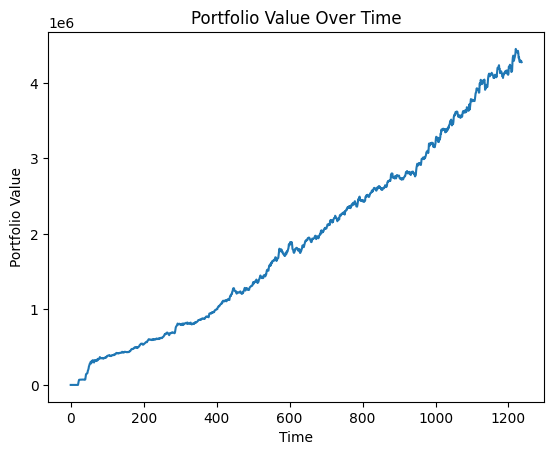

In [190]:
plt.plot(list(range(len(portfolio_value))), portfolio_value)
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

In [191]:
returns = []
for i in range(len(portfolio_value)):
    returns.append(portfolio_value[i] - principle_values[i])
sharpe = returns[-1]/np.std(returns)*np.sqrt(5)
print(sharpe)

[1.36828203]
